In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline
plt.style.use('seaborn')

STOP_SPEED_THRESHOLD = 0.5

print("Interpreting speed < {} as a stopped vessel".format(STOP_SPEED_THRESHOLD))

Interpreting speed < 0.5 as a stopped vessel


In [6]:
# load and sort the AIS data set
df_ais = pd.read_csv('../data/ais-observations-1-week-20180315.csv', parse_dates = ['timestamp'])
df_ais = df_ais.sort_values(by=['timestamp'])

display(df_ais.shape)
print("First rows of the AIS data set:")
display(df_ais.head())

(8425108, 7)

First rows of the AIS data set:


,timestamp,mmsi,lon,lat,sog,cog,heading
2263440,2018-03-14 23:59:59.064,276776000,21.473023,61.126297,0.0,63.7,323
2263441,2018-03-14 23:59:59.066,230992260,21.472692,61.127272,0.0,268.4,184
2263442,2018-03-14 23:59:59.067,230992660,28.877223,61.877110,0.0,0.0,511
2263443,2018-03-14 23:59:59.074,230115340,21.464200,61.594145,0.0,198.4,264
2263444,2018-03-14 23:59:59.089,230052840,28.386033,61.608773,0.0,1.6,1


### How many vessels are there in this data set?

In [7]:
df_ais['mmsi'].nunique()

256

### A 'quick' and dirty map visualization (can take a minute or two to render)

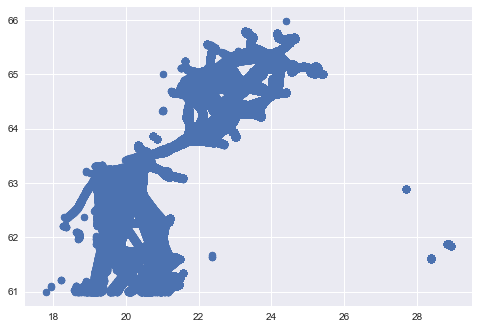

In [8]:
plt.scatter(df_ais.lon, df_ais.lat)

### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15ad149d0>,
      dtype=object)

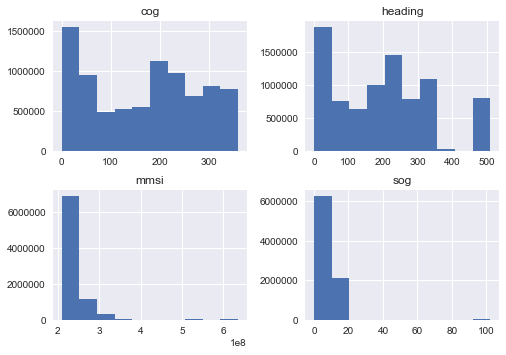

In [9]:
df_ais[['mmsi', 'sog', 'cog', 'heading']].hist()

### Distribution of AIS observations geographically binned

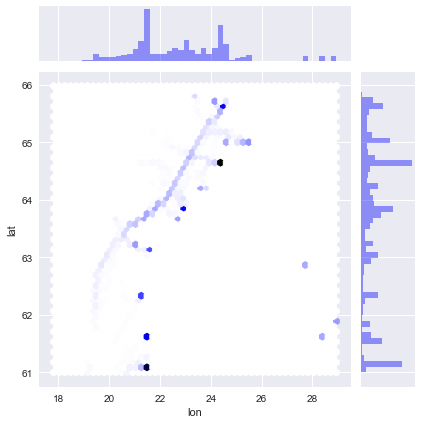

In [9]:
sns.jointplot(x=df_ais.lon, y=df_ais.lat, kind="hex", color="b")

### Descriptive analytics of the icebreakers

In [10]:
# some of the icebreakers in this list, not all. For instance, Sisu=230289000, Atle=265067000
ib_mmsis = [265348000, 265067000, 230245000, 265068000, 230251000, 230275000, 
            230252000, 230661000, 230289000, 230290000, 230291000, 265066000, 212409000]

df_ib_ais = df_ais[df_ais['mmsi'].isin(ib_mmsis)]

#### Icebreaker speed

Text(0.5, 1, 'Speed of icebreakers')

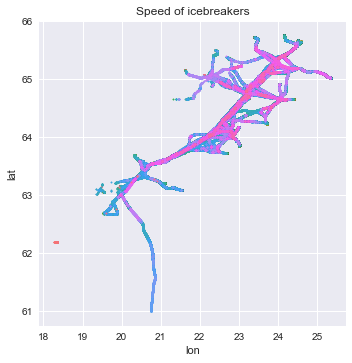

In [11]:
sns.lmplot(x="lon", y="lat", data=df_ib_ais, hue="sog", fit_reg=False, legend=False, scatter_kws={"s": 3})
plt.title("Speed of icebreakers")

### Where do the vessels stay still?

Text(0.5, 1, 'Locations of stopped vessels (Speed < 0.5 kn)')

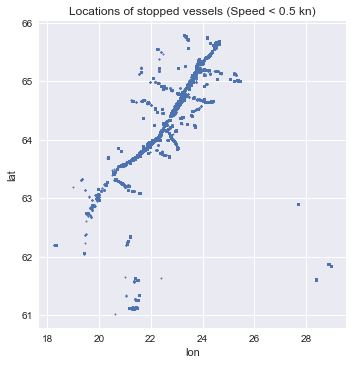

In [10]:
stopped = df_ais[df_ais['sog'] < STOP_SPEED_THRESHOLD]
sns.lmplot(x="lon", y="lat", data=stopped, fit_reg=False, legend=False, scatter_kws={"s": 3})
plt.title("Locations of stopped vessels (Speed < {} kn)".format(STOP_SPEED_THRESHOLD))

Text(0.5, 1.0, 'Locations of stopped vessels binned')

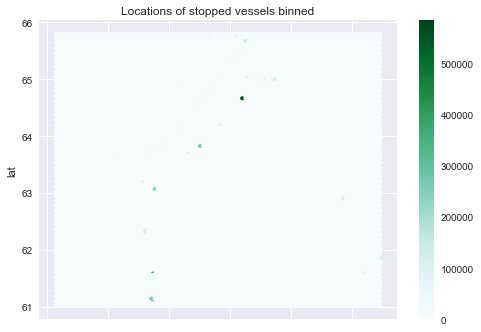

In [11]:
stopped.plot.hexbin(x='lon', y='lat')
plt.title("Locations of stopped vessels binned")

=> No Swedish ports in the dataset?

### Icebreaker Sisu

Text(0.5, 1, 'Icebreaker Sisu (N=168755)')

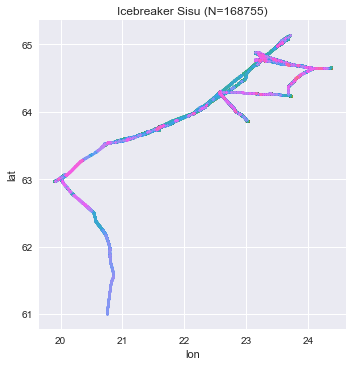

In [13]:
df_sisu_ais = df_ais[df_ais['mmsi'] == 230289000]
sns.lmplot(x="lon", y="lat", data=df_sisu_ais, hue="sog", fit_reg=False, legend=False, scatter_kws={"s": 3})
plt.title("Icebreaker Sisu (N={})".format(len(df_sisu_ais)))

### Task T1: Plot location and speed of icebreaker Atle

### T2: Visualize the distribution of the speed of AIS observations

See Seaborn documentation: [Visualizing the distribution of a dataset](https://seaborn.pydata.org/tutorial/distributions.html)

In [14]:
# first, we take only 10000 observations to dataframe df so that graphs render quickly
df_sample = df_ais.head(10000)

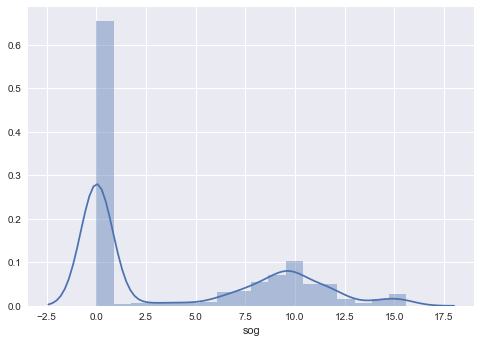

In [15]:
sns.distplot(df_sample.sog)

In [16]:
# now, render distplot of all ais observations:


What kind of conclusions can be made based on the visualization?

### T4: How many vessels visited Raahe in January 2018?

1) Read AIS-data to a GeoDataFrame by following this tutorial: https://cambridgespark.com/content/tutorials/geopandas/index.html

gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

2) Draw the port of Raahe as a shapefile polygon with this tool, for instance: http://gis.ucla.edu/apps/click2shp/

Hint: The port of Raahe is [here in this satellite image](https://www.google.fi/maps/place/Raahe/@64.657815,24.3969846,2266m/data=!3m1!1e3!4m5!3m4!1s0x46805786978a3b8f:0x40146d63c75bd20!8m2!3d64.6839541!4d24.4883649)

4) Read the Raahe port area from a shape file:
raahe_region = gpd.read_file(DATA_DIR + 'raahe_poly.shp')

4) Make a geospatial inner join of the intersection of AIS observations and the port area:
gpd.sjoin(gdf, raahe_region, how='inner', op='intersects')

5) Plot the end result

### T3: Plot icebreaker Frej when its speed was over 10 knots

Hint: Search Frej from [marinetraffic.com](https://www.marinetraffic.com/en/data/?asset_type=vessels&columns=flag,shipname,imo,photo,reported_destination,reported_eta,recognized_next_port,current_port,ship_type,show_on_live_map,time_of_latest_position,area,lat_of_latest_position,lon_of_latest_position&quicksearch|begins|quicksearch=frej) and take a look at [Pandas cheat sheet](https://www.dataquest.io/blog/large_files/pandas-cheat-sheet.pdf) section FILTER, SORT, & GROUPBY and there operator &

In [18]:
df_frej = df_ais[(df_ais['mmsi'] == 265068000)]
df_frej.head()

,timestamp,mmsi,lon,lat,sog,cog,heading
5020172,2018-03-17 09:49:44.460,265068000,18.275457,62.199458,0.3,111.0,191
5020181,2018-03-17 09:49:46.739,265068000,18.275457,62.199458,0.3,111.0,191
5020447,2018-03-17 09:50:04.499,265068000,18.275527,62.199445,0.3,116.7,191
5020472,2018-03-17 09:50:05.399,265068000,18.275527,62.199445,0.3,116.7,191
5030434,2018-03-17 10:01:42.643,265068000,18.277952,62.198947,0.4,116.5,190


Text(0.5, 1, 'Icebreaker Frej')

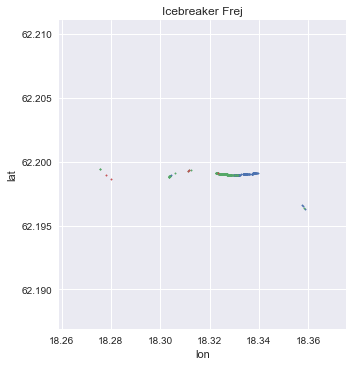

In [19]:
sns.lmplot(x="lon", y="lat", data=df_frej, hue="sog", fit_reg=False, legend=False, scatter_kws={"s": 3})
plt.title("Icebreaker Frej")

### Task T4: Where did Sisu stop?

Find all the locations where icebreaker Sisu was stopped. Most likely to ports, for instance.

Text(0.5, 1, 'Icebreaker Sisu (N=168755)')

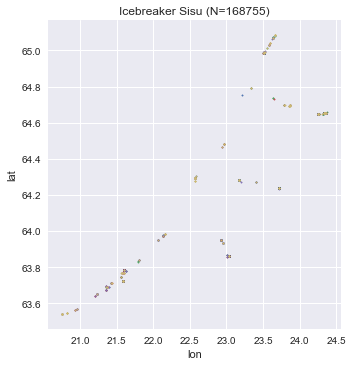

In [24]:
sns.lmplot(x="lon", y="lat", data=df_sisu_ais[df_sisu_ais['sog'] < STOP_SPEED_THRESHOLD], hue="sog", fit_reg=False, legend=False, scatter_kws={"s": 3})
plt.title("Icebreaker Sisu (N={})".format(len(df_sisu_ais)))

### T5: Where and when did Sisu tow a vessel?

### T6: Where and when did Sisu stop suddenly?

Acceleration was negative?

### T7: Where and when did Sisu stop suddenly when it was towing a vessel?